# As in the previous lab, authentication keys are read from a JSON file (which is not commited in the repository):

In [1]:
import json
jsonFileText = None
with open("TwitterKeys.json", 'r') as inputFile: jsonFileText = inputFile.read().replace('\n', '')
keys = json.loads(jsonFileText)

In [2]:
import tweepy
from tweepy import OAuthHandler
 
consumer_key = keys["consumer_key"]
consumer_secret = keys["consumer_secret"]
access_token = keys["access_token"]
access_secret = keys["access_secret"]

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

# Generate json file from the keyword defined here.
The filter(...) method will select the word or the line that you define here. The amount of time allowed to the download has barely been 1 minute.

In [3]:
from tweepy import Stream
from tweepy.streaming import StreamListener

topic = "Manchester"    # Change only this line to generate a file for this topic and with this name
fileName = topic + ".json"

class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open(fileName, 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=[topic])

KeyboardInterrupt: 

# Print the 'text' field from the file that was generated in the previous step:

In [4]:
import json  
with open(fileName,'r') as json_file:
         for line in json_file:
             tweet = json.loads(line)
             if "text" in tweet: print tweet["text"]

Get your shit together before you flap your lips, Sheriff. You have to HAVE guns in the first place to be DISARMED. https://t.co/jmIuqjYCuH
RT @AFP: #BREAKING Fifth man arrested in Manchester attack probe: police
RT @Independent: Andy Burnham: Manchester terrorist no more represents Muslims than Jo Cox's murderer represents white people https://t.co/…
RT @Claire_Phipps: Nell Jones has been named as one of the 22 who died in the Manchester attack. She was 14 years old https://t.co/6kFukWiz…
RT @Chris_Alexandr: "They want us to turn on our neighbours and it will never happen". Thank you Ian. #manchester https://t.co/Y6HF72xVVl
RT @winstonswish: Responding to young people affected by the media coverage of #Manchester incident - advice from @winstonswish: https://t.…
I imagine my little nieces attending the Ariana Grande concert at Manchester Arena and to read the headlines breaks my heart 💔💔💔
Well that's puzzling! https://t.co/LJLJ1WZbM6
This is so so important https://t.co/CGxEt61BtT
@Th

# In order to print the apropriate tokenization according to Twitter styles (as seen in Lab 2) we need to define de following code:

In [5]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

# Printing the tokens for tweets...

In [6]:
with open(fileName, 'r') as f:
#import io
#f=io.open('data/stream_barcelona.json', 'r', encoding='utf8' )
     for line in f:
        tweet = json.loads(line)
        if "text" in tweet: 
            tokens = preprocess(tweet['text'])
            print(tokens)

[u'Get', u'your', u'shit', u'together', u'before', u'you', u'flap', u'your', u'lips', u',', u'Sheriff', u'.', u'You', u'have', u'to', u'HAVE', u'guns', u'in', u'the', u'first', u'place', u'to', u'be', u'DISARMED', u'.', u'https://t.co/jmIuqjYCuH']
[u'RT', u'@AFP', u':', u'#BREAKING', u'Fifth', u'man', u'arrested', u'in', u'Manchester', u'attack', u'probe', u':', u'police']
[u'RT', u'@Independent', u':', u'Andy', u'Burnham', u':', u'Manchester', u'terrorist', u'no', u'more', u'represents', u'Muslims', u'than', u'Jo', u"Cox's", u'murderer', u'represents', u'white', u'people', u'https://t.co/', u'\u2026']
[u'RT', u'@Claire_Phipps', u':', u'Nell', u'Jones', u'has', u'been', u'named', u'as', u'one', u'of', u'the', u'22', u'who', u'died', u'in', u'the', u'Manchester', u'attack', u'.', u'She', u'was', u'14', u'years', u'old', u'https://t.co/6kFukWiz', u'\u2026']
[u'RT', u'@Chris_Alexandr', u':', u'"', u'They', u'want', u'us', u'to', u'turn', u'on', u'our', u'neighbours', u'and', u'it', u'will

# Printing the most popular tweets in that file:

In [7]:
with open(fileName, 'r') as f:
#import io
#f=io.open('data/stream_barcelona.json', 'r', encoding='utf8' )
     for line in f:
        tweet = json.loads(line)
        if "text" in tweet: 
            tokens = preprocess(tweet['text'])
            print(tokens)

[u'Get', u'your', u'shit', u'together', u'before', u'you', u'flap', u'your', u'lips', u',', u'Sheriff', u'.', u'You', u'have', u'to', u'HAVE', u'guns', u'in', u'the', u'first', u'place', u'to', u'be', u'DISARMED', u'.', u'https://t.co/jmIuqjYCuH']
[u'RT', u'@AFP', u':', u'#BREAKING', u'Fifth', u'man', u'arrested', u'in', u'Manchester', u'attack', u'probe', u':', u'police']
[u'RT', u'@Independent', u':', u'Andy', u'Burnham', u':', u'Manchester', u'terrorist', u'no', u'more', u'represents', u'Muslims', u'than', u'Jo', u"Cox's", u'murderer', u'represents', u'white', u'people', u'https://t.co/', u'\u2026']
[u'RT', u'@Claire_Phipps', u':', u'Nell', u'Jones', u'has', u'been', u'named', u'as', u'one', u'of', u'the', u'22', u'who', u'died', u'in', u'the', u'Manchester', u'attack', u'.', u'She', u'was', u'14', u'years', u'old', u'https://t.co/6kFukWiz', u'\u2026']
[u'RT', u'@Chris_Alexandr', u':', u'"', u'They', u'want', u'us', u'to', u'turn', u'on', u'our', u'neighbours', u'and', u'it', u'will

# Define the common stop words used in Twitter, like 'RT' (re-tweet), via (from)...

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Print the most common terms without considering the stop words:

In [9]:
import operator 
import json
from collections import Counter
 
with open(fileName, 'r') as f:
    count_all_stop = Counter()
    count_all_hash = Counter()
    count_all_only = Counter()
    for line in f:
        tweet = json.loads(line)
        if "text" in tweet: 
            terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
            terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#')]
            terms_only = [term for term in preprocess(tweet['text']) if term not in stop and not term.startswith(('#', '@'))]
            
            count_all_stop.update(terms_stop)
            count_all_hash.update(terms_hash)
            count_all_only.update(terms_only)

# Counting all type of terms
We can notice some strange symbols in the most common terms (emoticons maybe?).

In [10]:
for word, index in count_all_stop.most_common(5): print '%s : %s' % (word, index)

Manchester : 1575
… : 1419
attack : 311
#Manchester : 297
� : 263


# Couting just hashtags:

In [11]:
for word, index in count_all_hash.most_common(5): print '%s : %s' % (word, index)

#Manchester : 297
# : 35
#MUFC : 34
#manchester : 30
#ManchesterBombing : 25


# Couting only terms (no hashtags):

In [12]:
for word, index in count_all_only.most_common(5): print '%s : %s' % (word, index)

Manchester : 1575
… : 1419
attack : 311
� : 263
victims : 218


# Collect the most popular words:
This will search in our file and print the 10 most popular words from the JSON file. 10 different words and the repetition up to 15 times.
We could fathom what recently happened in Manchester. Basically we obtain terms like (What?) 'bombing', 'ISIS', (Where?) 'Manchester', 'ManchesterArena', (Event?) 'ArianaGrande'.

In [13]:
import operator 
import json
from collections import Counter
 
with open(fileName, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        if "text" in tweet: 
            terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#') and term not in stop]        
            count_all.update(terms_hash)
# Print the first 10 most frequent words
print(count_all.most_common(15))

[(u'#Manchester', 297), (u'#MUFC', 34), (u'#manchester', 30), (u'#ManchesterBombing', 25), (u'#BREAKING', 18), (u'#PrayForManchester', 16), (u'#Tripoli', 11), (u'#WeStandTogether', 11), (u'#ISIS', 10), (u'#ManchesterArena', 9), (u'#Libya', 8), (u'#ManchesterAttack', 7), (u'#ArianaGrande', 7), (u'#UELfinal', 6), (u'#PrayForJakarta', 6)]


# Plot a bar chart from the previously selected words:
Of course, the most popular words/terms/hashtags are, by far, Manchester and derivates.

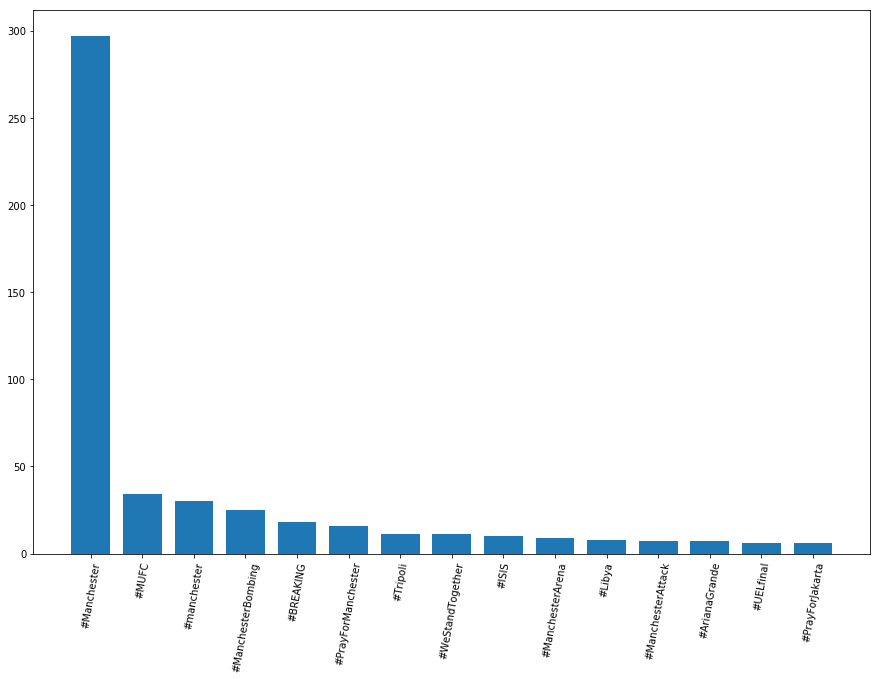

In [14]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight'); 